In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [36]:
!pip install keras
!pip install tensorflow

In [4]:
prices = pd.read_csv("/content/FB-stock-prices.csv")

In [5]:
prices.dtypes

,0
Date,object
Price,int64


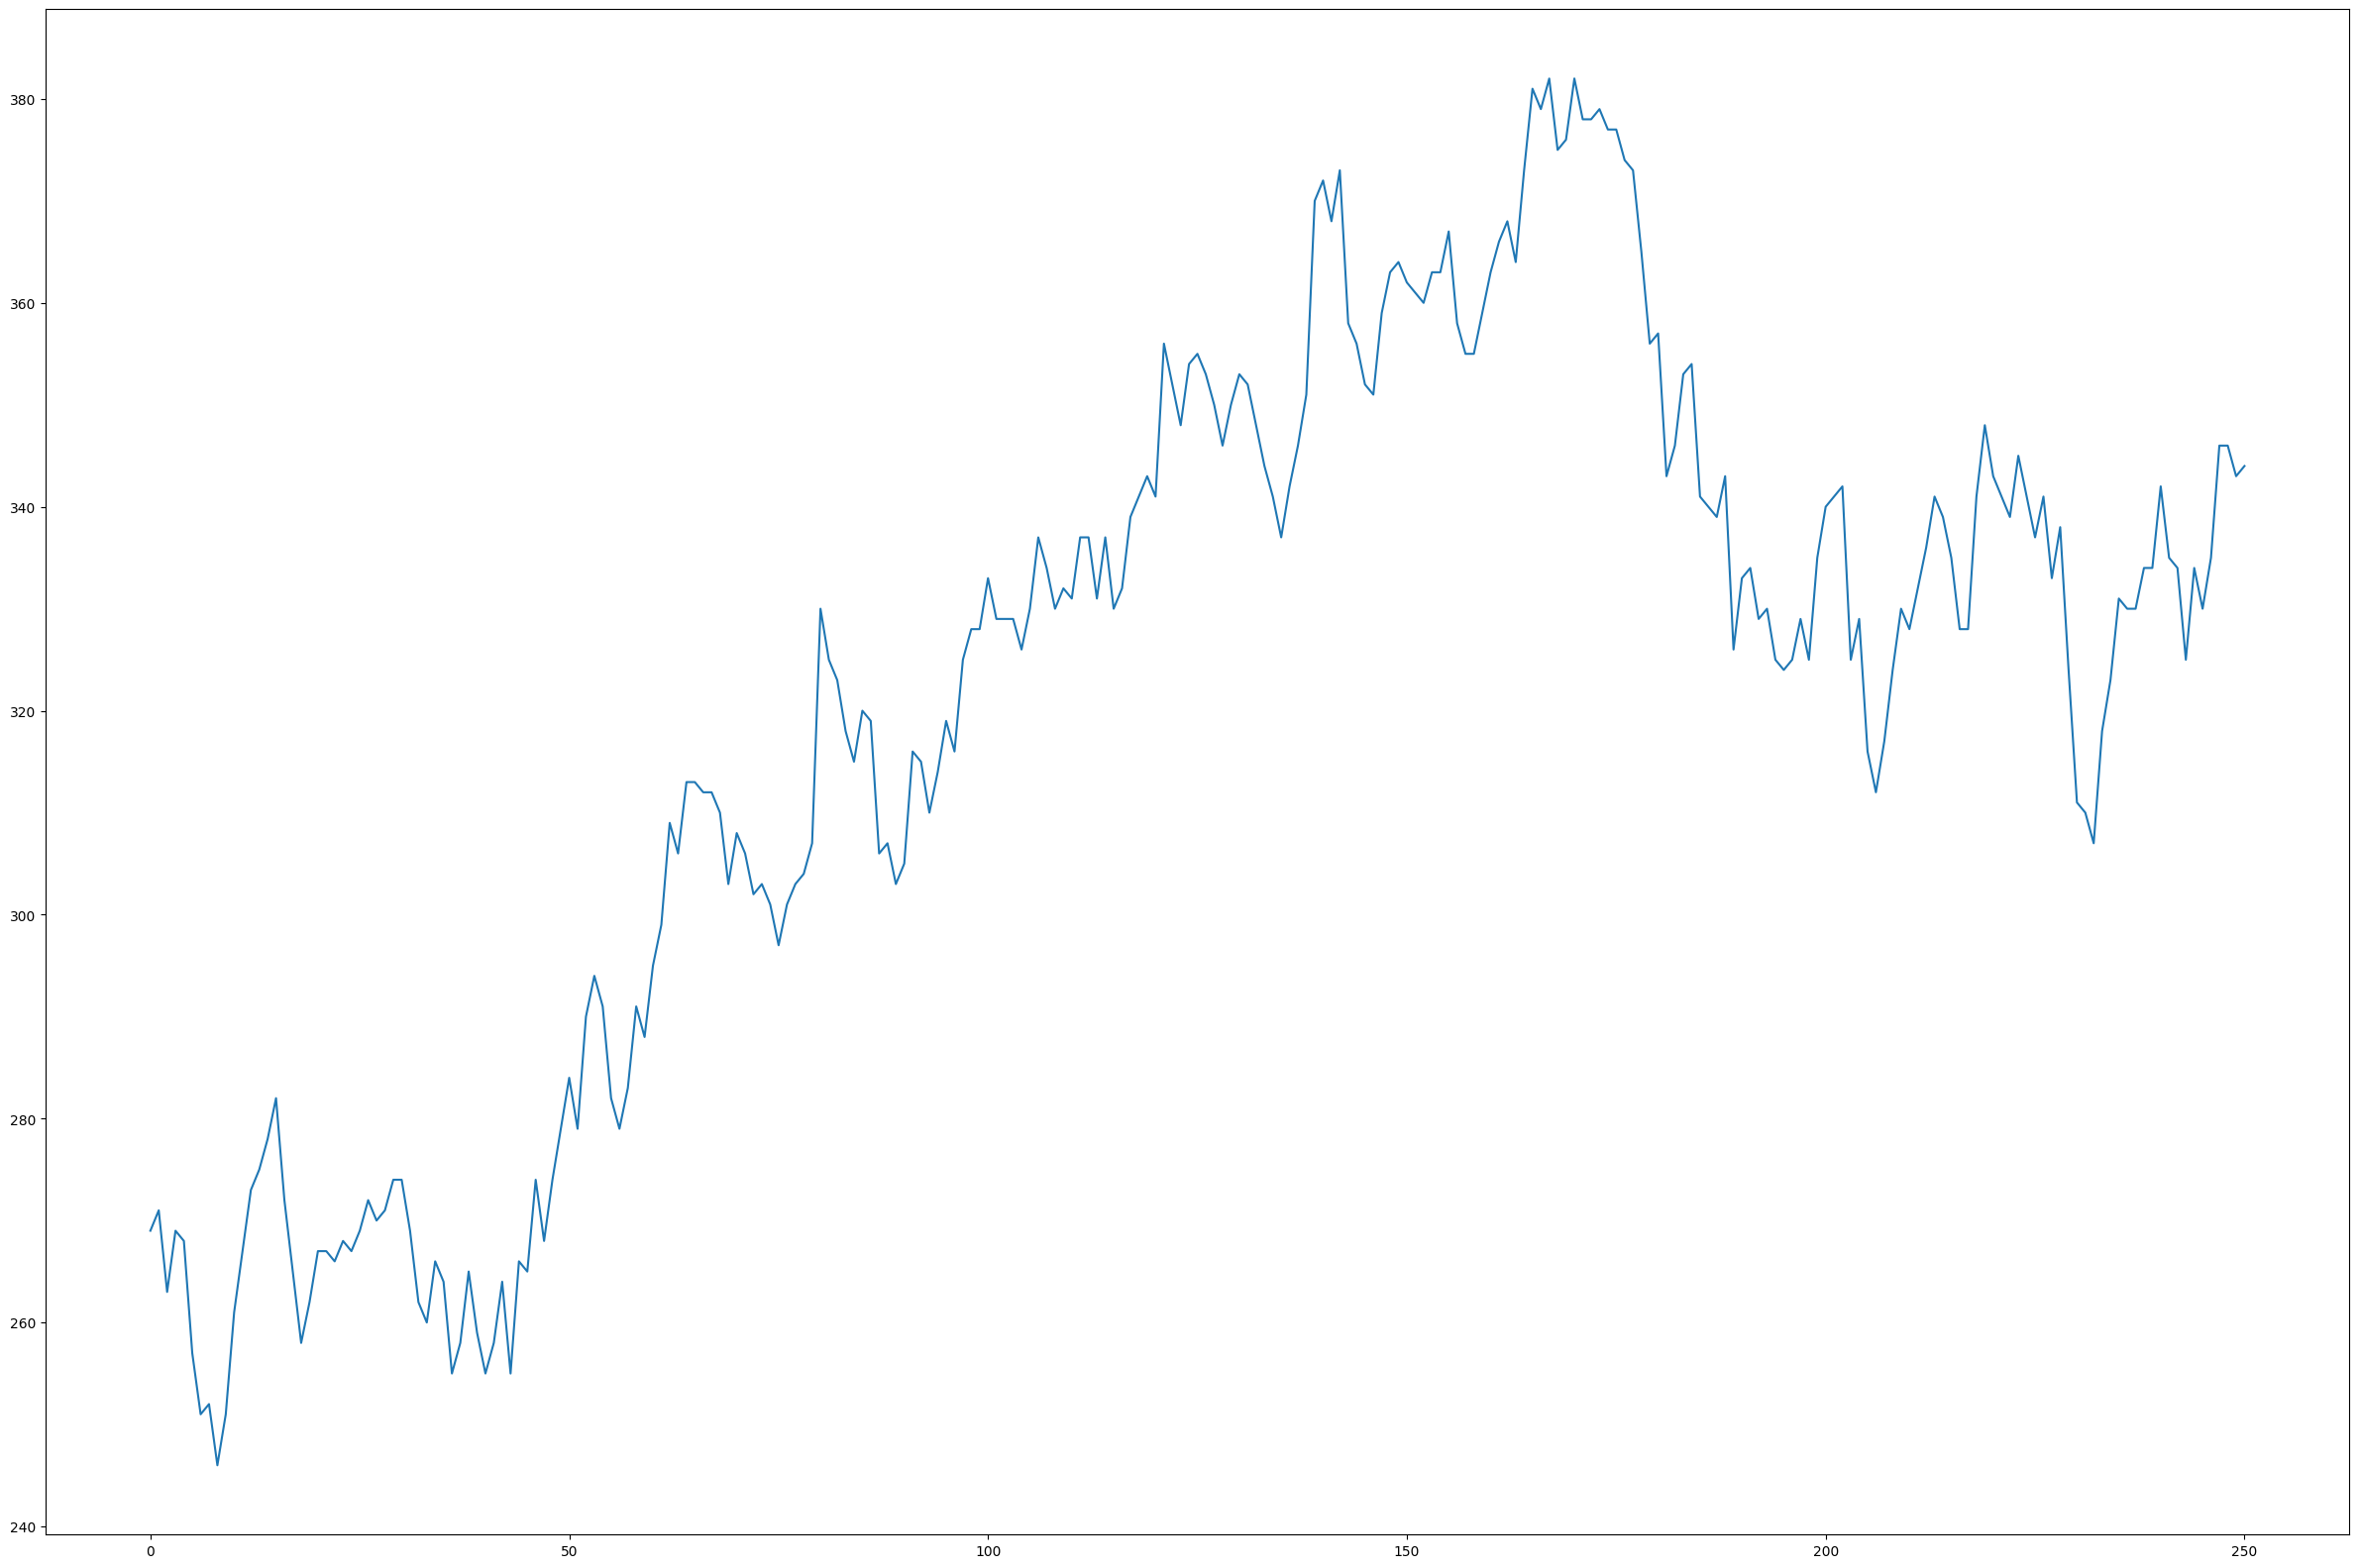

In [8]:
plt.figure(figsize=(30,20))
plt.plot(prices['Price'])
plt.show()

In [9]:
prices.count()

,0
Date,251
Price,251


Data Pre-Processing

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_prices = sc.fit_transform(prices[["Price"]].values)

In [11]:
print(scaled_prices)

[[-1.49673154]
 [-1.4393189 ]
 [-1.66896946]
 [-1.49673154]
 [-1.52543786]
 [-1.84120738]
 [-2.01344531]
 [-1.98473899]
 [-2.15697691]
 [-2.01344531]
 [-1.7263821 ]
 [-1.55414418]
 [-1.38190626]
 [-1.32449362]
 [-1.23837465]
 [-1.12354937]
 [-1.41061258]
 [-1.61155682]
 [-1.81250106]
 [-1.69767578]
 [-1.55414418]
 [-1.55414418]
 [-1.5828505 ]
 [-1.52543786]
 [-1.55414418]
 [-1.49673154]
 [-1.41061258]
 [-1.46802522]
 [-1.4393189 ]
 [-1.35319994]
 [-1.35319994]
 [-1.49673154]
 [-1.69767578]
 [-1.75508842]
 [-1.5828505 ]
 [-1.64026314]
 [-1.89862003]
 [-1.81250106]
 [-1.61155682]
 [-1.78379474]
 [-1.89862003]
 [-1.81250106]
 [-1.64026314]
 [-1.89862003]
 [-1.5828505 ]
 [-1.61155682]
 [-1.35319994]
 [-1.52543786]
 [-1.35319994]
 [-1.20966833]
 [-1.06613673]
 [-1.20966833]
 [-0.89389881]
 [-0.77907353]
 [-0.86519249]
 [-1.12354937]
 [-1.20966833]
 [-1.09484305]
 [-0.86519249]
 [-0.95131145]
 [-0.75036721]
 [-0.63554192]
 [-0.34847872]
 [-0.43459768]
 [-0.23365344]
 [-0.23365344]
 [-0.26235

In [12]:
total_size =len(scaled_prices)
test_size = 50
train_size = total_size - test_size

In [13]:
print(total_size)
print(test_size)
print(train_size)

251
50
201


In [15]:
training_prices = scaled_prices[0:train_size]
test_prices = scaled_prices[train_size:]

In [17]:
print(training_prices.shape)

(201, 1)


In [22]:
def create_rnn_dataset(data, lookback=1):
  data_x=[]
  data_y=[]
  for i in range(len(data)-lookback-1):
    a = data[i:(i+lookback),0]
    data_x.append(a)
    data_y.append(a)
  return numpy.array(data_x), numpy.array(data_y)

In [28]:
lookback = 25
train_req_x, train_req_y = create_rnn_dataset(training_prices, lookback)

In [29]:
train_req_y.shape

(175, 25)

In [30]:
train_req_x.shape

(175, 25)

In [34]:
train_req_x = numpy.reshape(train_req_x, (train_req_x.shape[0], 1, train_req_x.shape[1]))

In [35]:
print(train_req_x.shape)

(175, 1, 25)


In [38]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import tensorflow as tf

In [45]:
price_model = Sequential()
price_model.add(SimpleRNN(32,input_shape=(1,lookback)))
price_model.add(Dense(1))
price_model.compile( optimizer='adam', loss='mean_squared_error',metrics=['mse','accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
price_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
price_model.fit(train_req_x, train_req_y, epochs=5, batch_size=10, verbose=1)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: 1.3101 - mse: 1.3101
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1847 - mse: 0.1847  
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1424 - mse: 0.1424 
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.1167 - mse: 0.1167
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1165 - mse: 0.1165 


In [48]:
text_req_x, text_req_y = create_rnn_dataset(training_prices, lookback)
text_req_x=numpy.reshape(text_req_x, (text_req_x.shape[0], 1, text_req_x.shape[1]))

In [49]:
price_model.evaluate(text_req_x, text_req_y,verbose=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0939 - mse: 0.0939  


[0.1072646751999855, 0.1072646751999855, 0.0]

In [50]:
predict_on_text=price_model.predict(text_req_x)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [51]:
print(predict_on_text)

[[-1.4364554 ]
 [-1.4070902 ]
 [-1.5079365 ]
 [-1.540384  ]
 [-1.4887164 ]
 [-1.4863098 ]
 [-1.5317471 ]
 [-1.5201821 ]
 [-1.561653  ]
 [-1.5995538 ]
 [-1.5711937 ]
 [-1.6116582 ]
 [-1.5594649 ]
 [-1.5435555 ]
 [-1.5402207 ]
 [-1.4896348 ]
 [-1.4815766 ]
 [-1.5963565 ]
 [-1.5453448 ]
 [-1.5120159 ]
 [-1.4947741 ]
 [-1.6501588 ]
 [-1.5299857 ]
 [-1.5393826 ]
 [-1.5175284 ]
 [-1.6618692 ]
 [-1.540235  ]
 [-1.5304707 ]
 [-1.4266258 ]
 [-1.5732667 ]
 [-1.3533701 ]
 [-1.3244481 ]
 [-1.3747824 ]
 [-1.4515773 ]
 [-1.2405874 ]
 [-1.2114803 ]
 [-1.2154843 ]
 [-1.2031952 ]
 [-1.0054005 ]
 [-0.9444925 ]
 [-1.0674165 ]
 [-1.0899851 ]
 [-0.9068144 ]
 [-0.9501224 ]
 [-0.9879521 ]
 [-0.9990645 ]
 [-0.8179597 ]
 [-0.8212039 ]
 [-0.81779706]
 [-0.9096885 ]
 [-0.8156136 ]
 [-0.7484677 ]
 [-0.8172079 ]
 [-0.9107116 ]
 [-0.6995073 ]
 [-0.6144955 ]
 [-0.54551834]
 [-0.45449406]
 [-0.3926955 ]
 [-0.6079526 ]
 [-0.51303285]
 [-0.57358897]
 [-0.4549461 ]
 [-0.72161674]
 [-0.628127  ]
 [-0.75172347]
 [-0.52654

In [55]:
predicted_value = sc.inverse_transform(predict_on_text)
print(predicted_value)

[[271.09976]
 [272.1227 ]
 [268.60968]
 [267.47934]
 [269.2792 ]
 [269.36304]
 [267.7802 ]
 [268.18307]
 [266.73843]
 [265.41812]
 [266.40607]
 [264.99646]
 [266.81464]
 [267.36887]
 [267.48502]
 [269.24722]
 [269.52792]
 [265.5295 ]
 [267.30652]
 [268.46756]
 [269.06818]
 [263.65527]
 [267.84158]
 [267.51422]
 [268.27554]
 [263.24734]
 [267.48453]
 [267.82468]
 [271.44217]
 [266.33386]
 [273.99408]
 [275.0016 ]
 [273.24817]
 [270.57297]
 [277.9229 ]
 [278.9369 ]
 [278.7974 ]
 [279.2255 ]
 [286.11578]
 [288.23755]
 [283.9554 ]
 [283.16922]
 [289.55008]
 [288.0414 ]
 [286.7236 ]
 [286.3365 ]
 [292.6454 ]
 [292.53238]
 [292.65103]
 [289.44995]
 [292.7271 ]
 [295.06616]
 [292.67157]
 [289.4143 ]
 [296.77173]
 [299.73315]
 [302.13602]
 [305.3069 ]
 [307.4597 ]
 [299.9611 ]
 [303.26767]
 [301.15817]
 [305.29114]
 [296.00153]
 [299.2583 ]
 [294.95276]
 [302.79688]
 [304.37946]
 [302.2814 ]
 [306.4013 ]
 [310.3572 ]
 [302.53836]
 [308.69113]
 [312.46265]
 [310.18378]
 [315.64316]
 [314.17545]

In [65]:
prev_price = numpy.array([324, 356, 456, 398, 320, 345, 301 ,302, 304, 309, 333, 322, 311, 344 ,355, 366, 377, 388, 399, 319, 329,339,349,359,369])
sc_prices = sc.transform(prev_price.reshape(-1,1))
model_input = numpy.reshape(sc_prices, (sc_prices.shape[1],1,sc_prices.shape[0]))
pred = price_model.predict(model_input)
stock_pred = sc.inverse_transform(pred)
print(stock_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[349.76956]]
